In [1]:
import pandas as pd

In [2]:
new_data =  pd.read_csv("newDatapandas.csv")

In [3]:

# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')


In [4]:
new_data.head(3)

C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dif_latitude,dif_longitude,distancia,dia_semana,hora
0,8.0,2015-03-12 23:14:59 UTC,-73.993141,40.727940,-73.996613,40.744530,2,0.016590,0.003471,1.868306,4,23
1,10.0,2013-08-21 08:38:06 UTC,-73.964837,40.769933,-73.983462,40.761655,1,0.008278,0.018625,1.819197,3,8
2,5.5,2014-01-23 18:40:00 UTC,-74.001017,40.746352,-73.990873,40.739497,1,0.006855,0.010144,1.145462,4,18


In [5]:
new_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219173 entries, 0 to 2219172
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float64
 1   pickup_datetime    object 
 2   pickup_longitude   float64
 3   pickup_latitude    float64
 4   dropoff_longitude  float64
 5   dropoff_latitude   float64
 6   passenger_count    int64  
 7   dif_latitude       float64
 8   dif_longitude      float64
 9   distancia          float64
 10  dia_semana         int64  
 11  hora               int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 203.2+ MB


C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#se entablece las variables predictoras y obejtivos
# se establece las columnas
columnas_float = ["passenger_count","distancia","dia_semana", "hora"]
#extraccion de datos predictores
predictors = new_data[columnas_float]
#extraccion de dato objetivo
target = new_data["fare_amount"]

In [10]:
#Se indican las etiquetas de las variable predictoras y objetivos
predictors_label = ["passenger_count","distancia","dia_semana", "hora"]

target_label =["fare_amount"]

### Ajuste del modelos 

 No solo es importante ajustar el mdelos sino que tambien es importante cuantificar su capacidad para predecir observaciones, para esto dividimos los datos en dos grupos uno de entrenamiento y otro en test

In [11]:
# División de los datos en train y test

X_train, X_test, y_train, y_test = train_test_split(predictors,target,random_state = 123)
# Creación del modelo

modelo = DecisionTreeRegressor(max_depth = 3,random_state = 123)

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

In [12]:
predic = new_data[predictors_label]

C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Profundidad del árbol: 3
Número de nodos terminales: 8


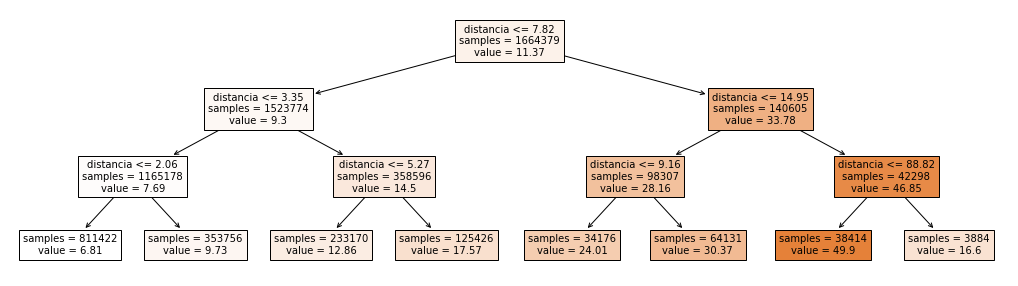

In [13]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(18, 5))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = predic.columns,
            class_names   = 'fare_amount',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )


In [14]:
texto_modelo = export_text(decision_tree = modelo,feature_names = list(new_data[predictors_label].columns)
               )
print(texto_modelo)

|--- distancia <= 7.82
|   |--- distancia <= 3.35
|   |   |--- distancia <= 2.06
|   |   |   |--- value: [6.81]
|   |   |--- distancia >  2.06
|   |   |   |--- value: [9.73]
|   |--- distancia >  3.35
|   |   |--- distancia <= 5.27
|   |   |   |--- value: [12.86]
|   |   |--- distancia >  5.27
|   |   |   |--- value: [17.57]
|--- distancia >  7.82
|   |--- distancia <= 14.95
|   |   |--- distancia <= 9.16
|   |   |   |--- value: [24.01]
|   |   |--- distancia >  9.16
|   |   |   |--- value: [30.37]
|   |--- distancia >  14.95
|   |   |--- distancia <= 88.82
|   |   |   |--- value: [49.90]
|   |   |--- distancia >  88.82
|   |   |   |--- value: [16.60]



Si seguimos la rama mas a la izquierda del arbol podemos notar que predice un precio promedio de 6.81 dolares por viaje que estan a un distancia <= 7.82 kilometros

### Importancia de Predictores

In [15]:
importancia_predictores = pd.DataFrame(
                            {'predictor': predic.columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
1,distancia,1.0
0,passenger_count,0.0
2,dia_semana,0.0
3,hora,0.0


Como podemos notar en la tabla la variable mas importante en el predictor es la distancia
tenendo en cuenta que la importancia de cada predictor en un modelo se calcula como la reduccion total(normalizada)en un criterio de division
si el predictor no ha sido seleccionado en ninguna prediccion, no se ha incluido en el modelo por tanto su valor es cero

## Podando el arbol
Se intenta encontrar el arbol mas sencillo ( menor tamaño) que consigue los mejores resultados de prediccion

In [15]:
#descomentar el codigo faltante para ejecutar el grafico

# Pruning (const complexity pruning) por validación cruzada
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeRegressor(max_depth  = None,min_samples_split = 2,min_samples_leaf  = 1,random_state      = 123),
        param_grid = param_grid,cv = 10,refit = True,return_train_score = True)

grid.fit(X_train, y_train)

#fig, ax = plt.subplots(figsize=(6, 3.84))
#scores = pd.DataFrame(grid.cv_results_)
#scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
#scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
#ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");



Para aplicar un proceso de prunning es necesario indicar el argumento ccp_aplpha que determine el grado de penalizacion por complejidad, cuando mayor sea este valor menor sera elk tamaño del arbol
Una vez que encontremos el cpp_alpha optimo lo que haremos es reentrenar el arbol.

In [17]:
#Mejor cpp_alpha encontrado
grid.best_params_

55423480

In [18]:
# Estructura del árbol final

modelo_final = grid.best_estimator_
print(f"Profundidad del árbol: {modelo_final.get_depth()}")
print(f"Número de nodos terminales: {modelo_final.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(7, 5))
plot = plot_tree(
            decision_tree = modelo_final,
            feature_names = predic.columns,
            class_names   = 'fare_amount',
            filled        = True,
            impurity      = False,
            ax            = ax)



<class 'dask.dataframe.core.DataFrame'>
Columns: 8 entries, key to passenger_count
dtypes: object(2), float64(5), int64(1)

El proceso de pruning a identificado como mejor árbol uno mucho más pequeño que el modelo inicialmente entrenado

In [ ]:
# Error de test del modelo inicial
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
# Error de test del modelo final (tras aplicar pruning)
predicciones = modelo_final.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

## Arbol de clasificacion

#### Librerias

In [17]:

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('once')


C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
new_data.head(3)

C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dif_latitude,dif_longitude,distancia,dia_semana,hora
0,8.0,2015-03-12 23:14:59 UTC,-73.993141,40.727940,-73.996613,40.744530,2,0.016590,0.003471,1.868306,4,23
1,10.0,2013-08-21 08:38:06 UTC,-73.964837,40.769933,-73.983462,40.761655,1,0.008278,0.018625,1.819197,3,8
2,5.5,2014-01-23 18:40:00 UTC,-74.001017,40.746352,-73.990873,40.739497,1,0.006855,0.010144,1.145462,4,18


In [19]:


new_data['muchos_pasajeros'] = np.where(new_data.passenger_count > 5, 0, 1)
# Una vez creada la nueva variable respuesta se descarta la original
new_data = new_data.drop(columns = 'passenger_count')


C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219173 entries, 0 to 2219172
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float64
 1   pickup_datetime    object 
 2   pickup_longitude   float64
 3   pickup_latitude    float64
 4   dropoff_longitude  float64
 5   dropoff_latitude   float64
 6   dif_latitude       float64
 7   dif_longitude      float64
 8   distancia          float64
 9   dia_semana         int64  
 10  hora               int64  
 11  muchos_pasajeros   int32  
dtypes: float64(8), int32(1), int64(2), object(1)
memory usage: 194.7+ MB


C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
#se entablece las variables predictoras y obejtivos
# se establece las columnas
columnas_float = ["distancia","dia_semana", "hora","fare_amount"]
#extraccion de datos predictores
predictors = new_data[columnas_float]
#extraccion de dato objetivo

objetivo = ["muchos_pasajeros"]
target = new_data[objetivo]

In [22]:
#Se indican las etiquetas de las variable predictoras y objetivos
predictors_label = ["distancia","dia_semana", "hora","fare_amount"]

target_label =["muchos_pasajeros"]

### Ajuste del modelo

En este arbol d clasificacion empleamos la variable de respuesta `muchos_pasajeros` y las demas variables las variables predictoras usamos los hiperparametros `max_deppth =5` y `creiterion = 'gini`

In [23]:
# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(predictors,target,random_state = 123)

# One-hot-encoding de las variables categóricas

# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough')

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)


El resultado devuelto por `ColumnTransformer` es un `numpy array`, por lo que se pierden los nombres de las columnas. Suele ser interesante poder inspeccionar cómo queda el set de datos tras el preprocesado en formato dataframe. Por defecto, `OneHotEncoder` ordena las nuevas columnas de izquierda a derecha por orden alfabético

In [24]:
X_train_prep = pd.DataFrame(X_train_prep,columns =numeric_cols)
X_test_prep  = pd.DataFrame(X_test_prep,columns = numeric_cols)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664379 entries, 0 to 1664378
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   distancia    1664379 non-null  float64
 1   dia_semana   1664379 non-null  float64
 2   hora         1664379 non-null  float64
 3   fare_amount  1664379 non-null  float64
dtypes: float64(4)
memory usage: 50.8 MB


In [25]:
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train_prep, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Profundidad del árbol: 5
Número de nodos terminales: 32


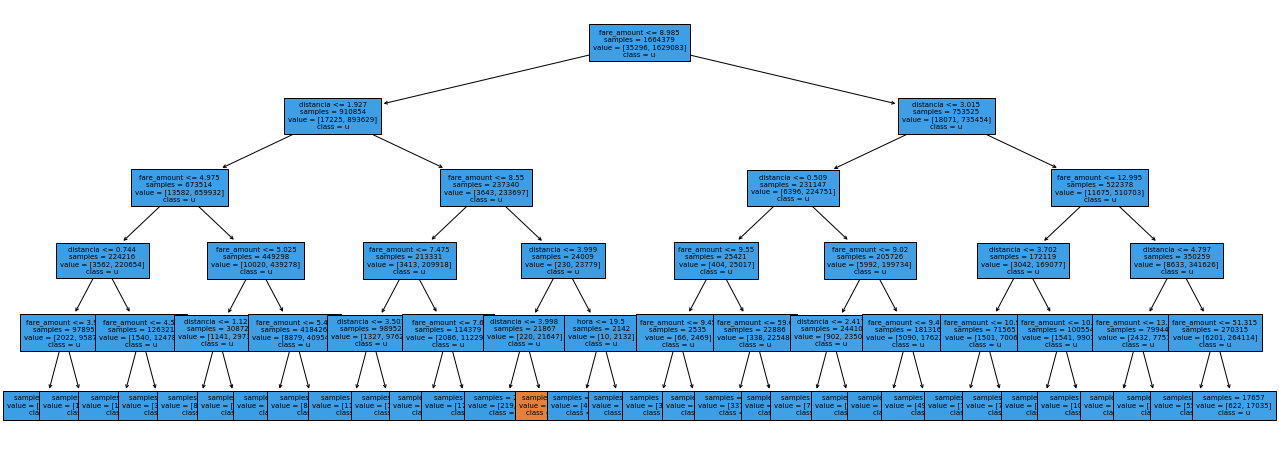

In [26]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(22, 8))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = numeric_cols,
            class_names   = "muchos_pasajeros",
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

### Prediccion y evaluacion del modelo

Evaluaremos la capacidad predictiva del arbol

In [27]:
# Error de test del modelo
predicciones = modelo.predict(X = X_test_prep,)

print("Matriz de confusión")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predicciones
)



Matriz de confusión
-------------------


array([[     0,  11829],
       [     2, 542963]], dtype=int64)

In [28]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print(f"El accuracy de test es: {100 * accuracy} %")


El accuracy de test es: 97.86749676456486 %


C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Esto nos indica que el modelo inicial es capz de predecir el 97.87% de las observaciones del conjunto de test

### Podando el arbol 

In [ ]:

# Post pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 5, 10)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible antes de aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train_prep, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");



C:\Users\frank\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
